In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['relativedelta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase


In [9]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [10]:
diff_month(datetime.datetime(2010,10,1), datetime.datetime(2010,9,1)) 

1

In [11]:
diff_year(start_date,original_df.date[0])

7

In [17]:
original_df.size

409944

In [12]:
#Months
original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_purchase']=original_df.date.apply(lambda x: diff_year(start_date,x))


In [13]:
original_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase
0,760,25.0,2009-11-06,11,2009,2247 days,74,7
1,860,50.0,2012-09-28,9,2012,1190 days,40,4
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3


In [23]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases',np.median(original_df.groupby(by=['customer_id']).count()['amount']))


Average purchases 2.7823749796383774
Median purchases 2.0


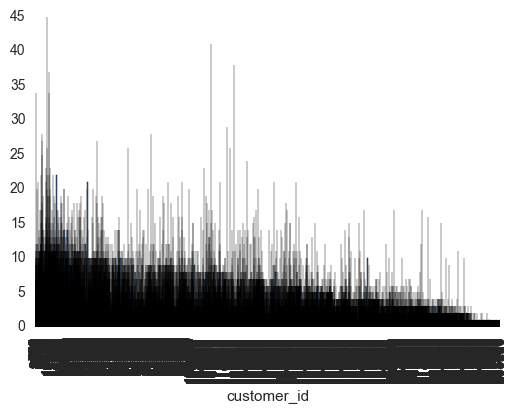

In [20]:
original_df.groupby(by=['customer_id']).count()['amount'].plot(kind='bar') ## number of purchases per person

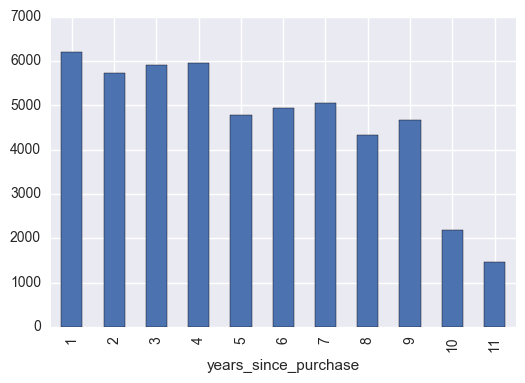

In [122]:
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar')

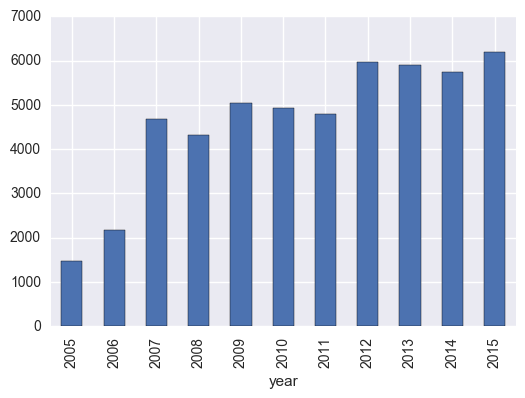

In [80]:
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

In [79]:
original_df.groupby(['year']).count()['customer_id']

year
2005    1470
2006    2182
2007    4674
2008    4331
2009    5054
2010    4939
2011    4785
2012    5960
2013    5912
2014    5739
2015    6197
Name: customer_id, dtype: int64